# Apartado C

Aquí hacemos los imports necesarios y cargamos nuestra base de datos

In [1]:
from sklearn.datasets import make_regression
from scipy.stats import normaltest
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Visualizaremos solo 3 decimales por muestra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcion para leer datos en formato csv
colnam = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, skiprows = 1, names=colnam, delimiter='\s+')
    return dataset

# Cargamos el dataset
dataset = load_dataset('housing.csv')

x = dataset.drop(['MEDV'], axis = 1)
y = dataset['MEDV']

print("Dimensionalidad de la BD:", dataset.shape)
print("Dimensionalidad de las entradas X", x.shape)
print("Dimensionalidad del atributo Y", y.shape)

Dimensionalidad de la BD: (504, 14)
Dimensionalidad de las entradas X (504, 13)
Dimensionalidad del atributo Y (504,)


Funciones necesarias para el trabajo

In [2]:
def regression(x, y):
    #Creamos un objeto de regresión de sklearn
    regr = LinearRegression()

    #Entrenamos el modelo para predecir y a partir de x
    regr.fit(x, y)

    #Devolvemos el modelo entrenado
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

Vizualizamos 5 primeras muestras de la base de datos:

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
1,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
2,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200
3,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222.000,18.700,394.120,5.210,28.700
4,0.088,12.500,7.870,0,0.524,6.012,66.600,5.561,5,311.000,15.200,395.600,12.430,22.900


Obtenemos información general sobre la estructura de la base de datos:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       504 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     504 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      504 non-null    int64  
 9   TAX      504 non-null    float64
 10  PTRATIO  504 non-null    float64
 11  B        504 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     504 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.2 KB


Contamos los valores no existentes:

In [5]:
print(dataset.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Visualizamos las estadísticas principales:

In [6]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000,504.000
mean,3.628,11.373,11.162,0.069,0.555,6.284,68.561,3.792,9.581,408.790,18.463,356.514,12.675,22.532
std,8.616,23.361,6.860,0.254,0.116,0.704,28.201,2.109,8.710,168.634,2.164,91.441,7.145,9.215
min,0.009,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,44.850,2.097,4.000,279.000,17.400,375.300,6.990,16.950
50%,0.260,0.000,9.690,0.000,0.538,6.205,77.500,3.191,5.000,330.000,19.100,391.385,11.395,21.200
75%,3.682,12.500,18.100,0.000,0.624,6.626,94.100,5.213,24.000,666.000,20.200,396.210,16.992,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


Construimos boxplots de cada una de las variables de la base de datos:

<IPython.core.display.Javascript object>


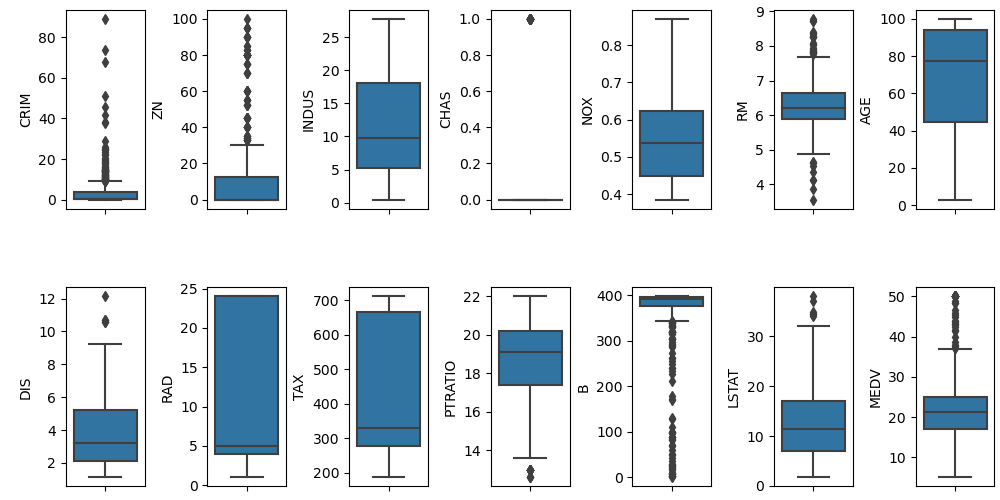

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Obtenemos información sobre densidad de valores de todos los atributos:

<IPython.core.display.Javascript object>


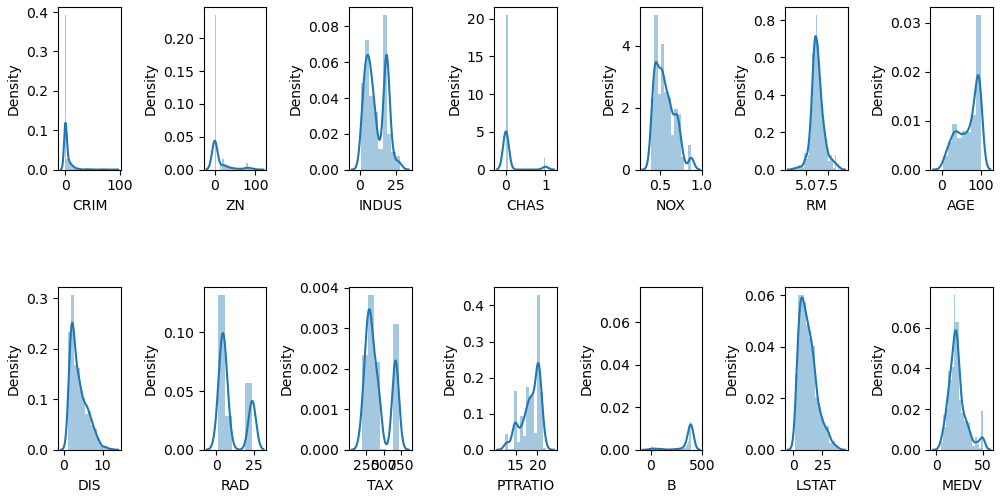

In [8]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(10, 5))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Mostramos el porcentaje de valores atípicos:

In [9]:
for k, v in dataset.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
    print("Columna %s -> porcentaje de valores atípicos = %.2f%%" % (k, perc))

Columna CRIM -> porcentaje de valores atípicos = 13.10%
Columna ZN -> porcentaje de valores atípicos = 13.49%
Columna INDUS -> porcentaje de valores atípicos = 0.00%
Columna CHAS -> porcentaje de valores atípicos = 100.00%
Columna NOX -> porcentaje de valores atípicos = 0.00%
Columna RM -> porcentaje de valores atípicos = 5.95%
Columna AGE -> porcentaje de valores atípicos = 0.00%
Columna DIS -> porcentaje de valores atípicos = 0.99%
Columna RAD -> porcentaje de valores atípicos = 0.00%
Columna TAX -> porcentaje de valores atípicos = 0.00%
Columna PTRATIO -> porcentaje de valores atípicos = 2.98%
Columna B -> porcentaje de valores atípicos = 15.08%
Columna LSTAT -> porcentaje de valores atípicos = 1.19%
Columna MEDV -> porcentaje de valores atípicos = 7.34%


Utilizamos normaltest de scypy.stats para ver si existen atributos con distribución gaussiana:

In [10]:
for idx, dist in enumerate([dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'],
                           dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], 
                           dataset['LSTAT'], dataset['MEDV']]):

    stat, p = normaltest(dist)
    alpha = .05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f' {idx} The null hypothesis can be rejected')
    else:
        print(f' {idx} The null hypothesis cannot be rejected (comes from a normal dist)')



 0 The null hypothesis can be rejected
 1 The null hypothesis can be rejected
 2 The null hypothesis can be rejected
 3 The null hypothesis can be rejected
 4 The null hypothesis can be rejected
 5 The null hypothesis can be rejected
 6 The null hypothesis can be rejected
 7 The null hypothesis can be rejected
 8 The null hypothesis can be rejected
 9 The null hypothesis can be rejected
 10 The null hypothesis can be rejected
 11 The null hypothesis can be rejected
 12 The null hypothesis can be rejected
 13 The null hypothesis can be rejected


Construimos la matriz de correlación para encontrar los valores más importantes:

<IPython.core.display.Javascript object>


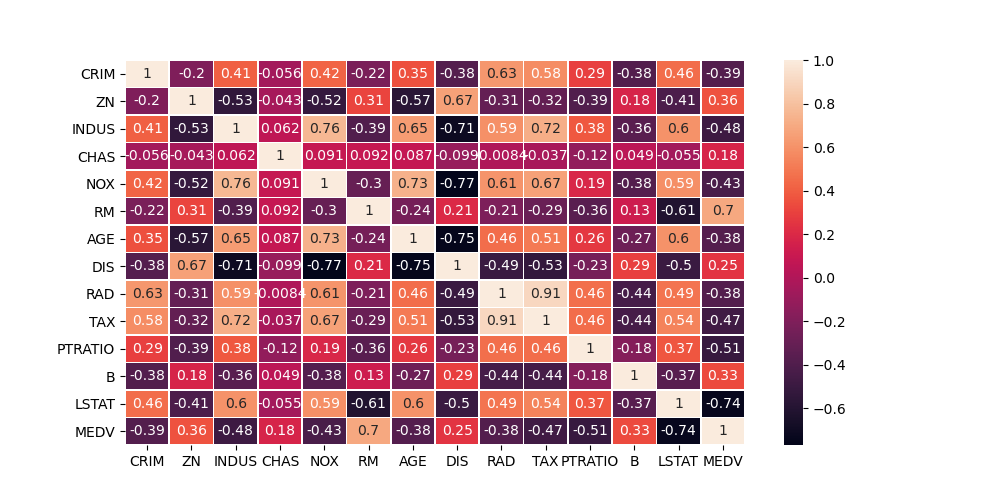

In [11]:
correlacion = dataset.corr()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(correlacion, annot=True, linewidths=.5)

# Apartado B

Dividimos el dataset en conjuntos de entrenamiento y test (por defecto, 75% entrenamiento y 25% test)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=23)

### Entrenar datos con modelo de regresión linear sin estandarizar datos

CRIM - MSE: 73.739; R2: 0.169; MAE: 6.376
ZN - MSE: 78.057; R2: 0.120; MAE: 6.463
INDUS - MSE: 69.123; R2: 0.221; MAE: 6.215
CHAS - MSE: 86.455; R2: 0.026; MAE: 6.819
NOX - MSE: 71.200; R2: 0.198; MAE: 6.139
RM - MSE: 55.954; R2: 0.370; MAE: 4.856
AGE - MSE: 72.661; R2: 0.181; MAE: 6.128
DIS - MSE: 84.065; R2: 0.053; MAE: 6.647
RAD - MSE: 75.817; R2: 0.146; MAE: 6.361
TAX - MSE: 71.223; R2: 0.197; MAE: 6.099
PTRATIO - MSE: 69.218; R2: 0.220; MAE: 6.082
B - MSE: 82.937; R2: 0.065; MAE: 6.752
LSTAT - MSE: 43.193; R2: 0.513; MAE: 4.992


<IPython.core.display.Javascript object>


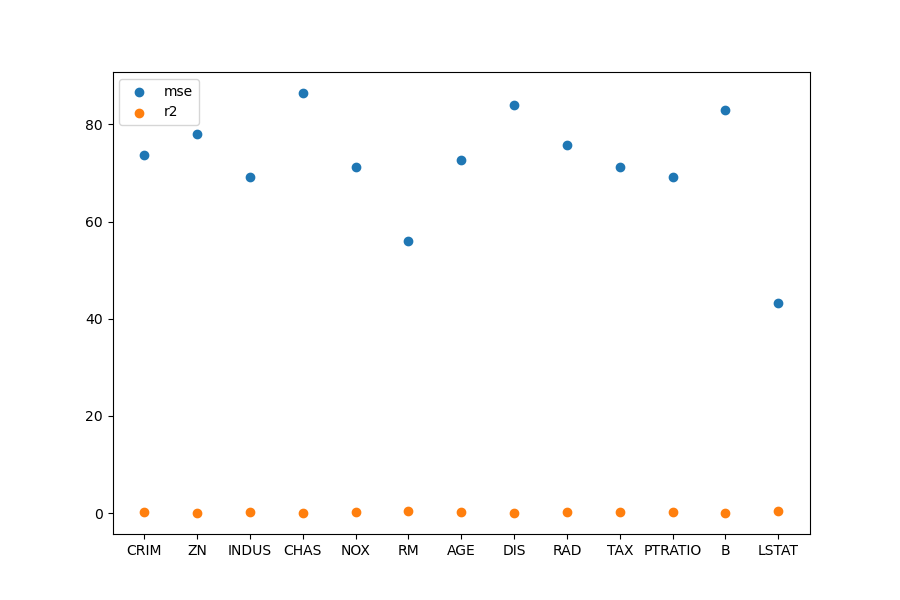

In [13]:
features = x.columns.values

mses, r2s = [], []

linear_model = LinearRegression()
for col in features:
    x_train, x_test, y_train, y_test = train_test_split(x[[col]], y,  random_state=23)
    linear_model.fit(x_train, y_train)
    preds = linear_model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mses.append(mse)
    
    r2 = r2_score(y_test, preds)
    r2s.append(r2)

    print(f"{col} - MSE: {mse:.3f}; R2: {r2:.3f}; MAE: {mae:.3f}")

mses = np.array(mses)
r2s = np.array(r2s)
plt.figure(figsize=(9,6)) 
plt.scatter(features, mses, label='mse')
plt.scatter(features, r2s, label='r2')
plt.legend()
plt.show()

### Ahora hacemos lo mismo, pero con datos normalizados

CRIM - MSE: 0.868; R2: 0.169; MAE: 0.692
ZN - MSE: 0.919; R2: 0.120; MAE: 0.701
INDUS - MSE: 0.814; R2: 0.221; MAE: 0.674
CHAS - MSE: 1.018; R2: 0.026; MAE: 0.740
NOX - MSE: 0.838; R2: 0.198; MAE: 0.666
RM - MSE: 0.659; R2: 0.370; MAE: 0.527
AGE - MSE: 0.856; R2: 0.181; MAE: 0.665
DIS - MSE: 0.990; R2: 0.053; MAE: 0.721
RAD - MSE: 0.893; R2: 0.146; MAE: 0.690
TAX - MSE: 0.839; R2: 0.197; MAE: 0.662
PTRATIO - MSE: 0.815; R2: 0.220; MAE: 0.660
B - MSE: 0.977; R2: 0.065; MAE: 0.733
LSTAT - MSE: 0.509; R2: 0.513; MAE: 0.542


<IPython.core.display.Javascript object>


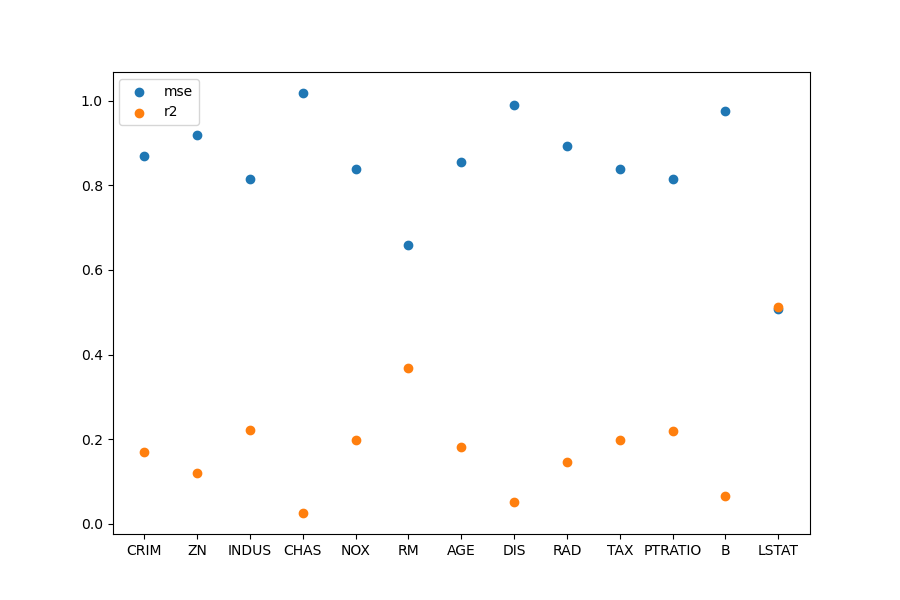

In [14]:
dataset_norm = (dataset - dataset.mean()) / dataset.std()
x_norm = dataset_norm.drop(['MEDV'], axis = 1)
y_norm = dataset_norm['MEDV']

features = x_norm.columns.values

mses, r2s = [], []

linear_model = LinearRegression()
for col in features:
    x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm[[col]], y_norm,  random_state=23)
    linear_model.fit(x_train_norm, y_train_norm)
    preds = linear_model.predict(x_test_norm)
    mse = mean_squared_error(y_test_norm, preds)
    mae = mean_absolute_error(y_test_norm, preds)
    mses.append(mse)
    
    r2 = r2_score(y_test_norm, preds)
    r2s.append(r2)

    print(f"{col} - MSE: {mse:.3f}; R2: {r2:.3f}; MAE: {mae:.3f}")

mses = np.array(mses)
r2s = np.array(r2s)
plt.figure(figsize=(9,6)) 
plt.scatter(features, mses, label='mse')
plt.scatter(features, r2s, label='r2')
plt.legend()
plt.show()

Evaluamos el modelo basado en RM y LSTAT

<IPython.core.display.Javascript object>


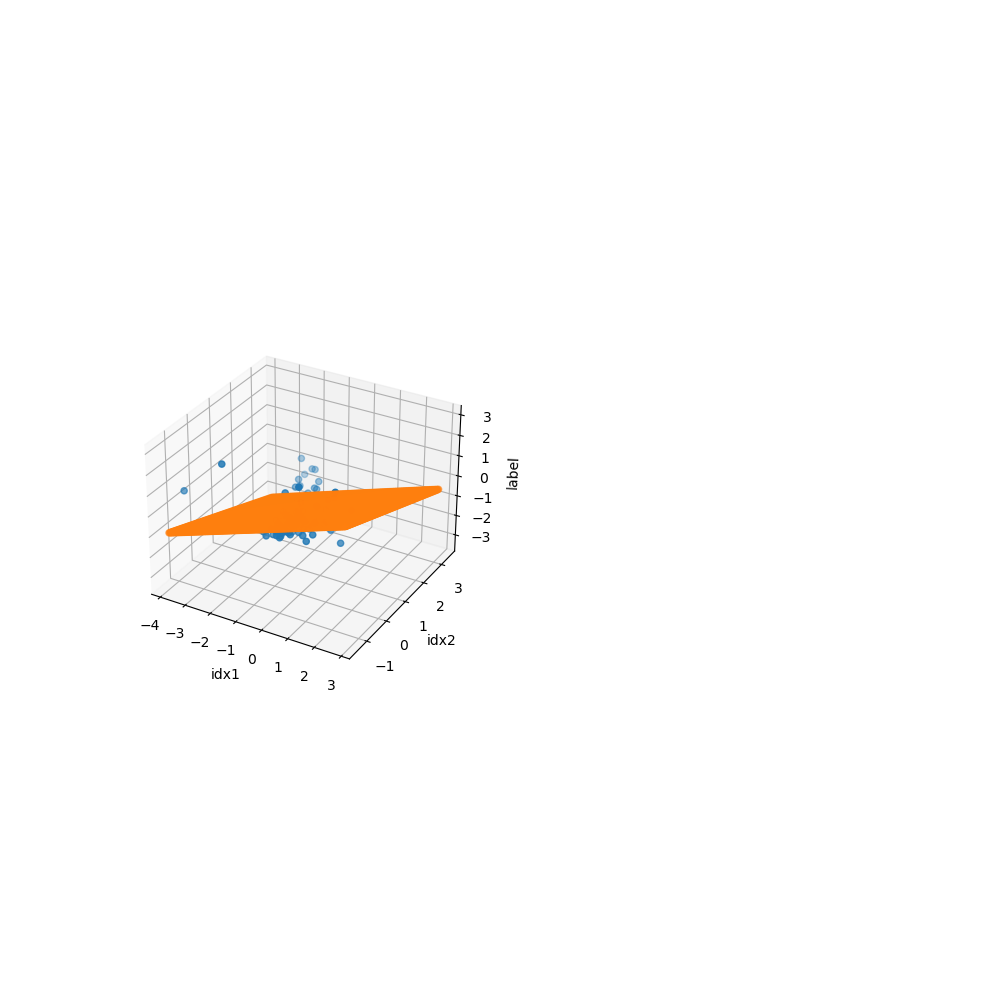

0.5490121367756857 by taking into account RM and LSTAT


In [15]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_norm,  random_state=23)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(1, 2, 1, projection='3d')

idxs = [5,12]
model = linear_model.fit(x_train_norm[['RM', 'LSTAT']], y_train_norm)
#model = regression(train_x_norm[:, idxs, None], train_y_norm)   
score = model.score(x_test_norm[['RM', 'LSTAT']], y_test_norm)

# plot de los puntos en los 3 ejes: los 2 atributos y el valor real a predecir (y)
ax.scatter(x_test_norm['RM'], x_test_norm['LSTAT'], y_test_norm)

# creamos una malla de samples sobre las que queremos predecir el valor
x_pred, y_pred = np.meshgrid(
    np.linspace(x_test_norm['RM'].min(), x_test_norm['RM'].max(), 100),
    np.linspace(x_test_norm['LSTAT'].min(), x_test_norm['LSTAT'].max(), 100),
)
to_pred = np.array([x_pred.flatten(), y_pred.flatten()]).T

preds = model.predict(to_pred)

# ploteamos todos los puntos que conforman la malla para generar el plano de puntos
ax.scatter(x_pred.flatten(), y_pred.flatten(), preds)

ax.set_xlabel('idx1')
ax.set_ylabel('idx2')
ax.set_zlabel('label')

print(score, "by taking into account RM and LSTAT")

Evaluamos el modelo con el conjunto de validación

In [16]:
def standarize(x, mean=None, std=None):
    if mean is None:
        mean = x.mean(0)
    if std is None:
        std = x.std(0)
    
    return (x - mean[None, :]) / std[None, :], mean, std

from sklearn.model_selection import train_test_split
def split_data(x, y, train_ratio=0.75):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val


X = dataset.drop(['CRIM', 'ZN','INDUS','CHAS','NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'MEDV'], axis = 1)
y = dataset["MEDV"]


x_train, y_train, x_val, y_val = split_data(X.values, y.values)

train_x_norm, mean, std = standarize(x_train)
test_x_norm, _, _ = standarize(x_val, mean, std)

train_y_norm, mean, std = standarize(y_train[:, None])
test_y_norm, _, _ = standarize(y_val[:, None], mean, std)

model = LinearRegression()

for i in range(train_x_norm.shape[1]):
    x_t = train_x_norm[:,i] 
    x_v = test_x_norm[:,i] 
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))
    
    model.fit(x_t, train_y_norm)
    error = mean_squared_error(test_y_norm, model.predict(x_v)) # calculem error
    r2 = r2_score(test_y_norm, model.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Error en atribut 0: 0.514719
R2 score en atribut 0: 0.560417
Error en atribut 1: 0.539207
R2 score en atribut 1: 0.539504


Miramos qué cantidad de atributos da los mejores resultados con PCA

PCA_1 - MSE: 0.665; R2: 0.364
PCA_2 - MSE: 0.581; R2: 0.445
PCA_3 - MSE: 0.464; R2: 0.556
PCA_4 - MSE: 0.452; R2: 0.568
PCA_5 - MSE: 0.426; R2: 0.593
PCA_6 - MSE: 0.425; R2: 0.594
PCA_7 - MSE: 0.426; R2: 0.592
PCA_8 - MSE: 0.418; R2: 0.600


<IPython.core.display.Javascript object>


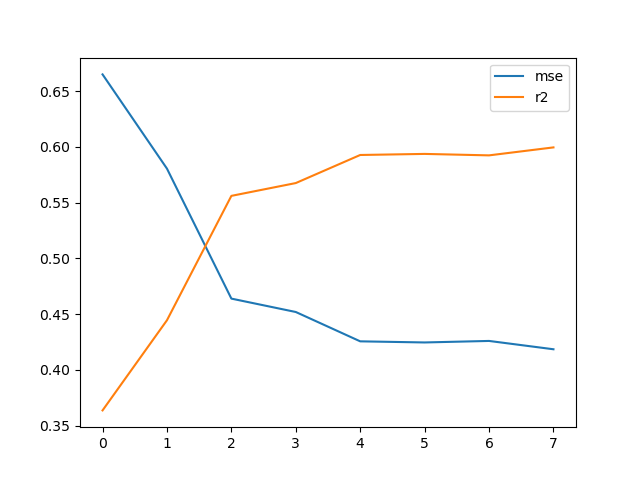

In [17]:
from sklearn.decomposition import PCA
mses, r2s = [], []

for i in range(1, 9):
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train_norm)
    x_test = pca.transform(x_test_norm)

    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train_norm)
    preds = linear_model.predict(x_test)

    mse = mean_squared_error(y_test_norm, preds)
    r2 = r2_score(y_test_norm, preds)
    print(f"PCA_{i} - MSE: {mse:.3f}; R2: {r2:.3f}")
    
    mses.append(mse)
    r2s.append(r2)
plt.figure() 
plt.plot(mses, label='mse')
plt.plot(r2s, label='r2')
plt.legend()
plt.show()

# Apartado A

Definición de regresor

In [18]:
class Regressor(object):
    def __init__(self):
        self.costs = []
        
    def predict(self, x):
        return np.matmul(x, self.w)
    
    def cost(self, prediction, y):
        cost = (1/(2*len(y))) * (sum((prediction - y) ** 2))
        cost += self.reg * sum(self.w ** 2)
        return cost
    
    def update(self, x, hy, y):
        error = (np.matmul(x, self.w)) - y
        self.w = self.w - ((self.alpha/len(y)) * np.matmul(x.transpose(), error) - (self.reg/len(y) * self.w))
    
    def train(self, x, y, max_iter, epsilon, alpha, reg):
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.alpha = alpha
        self.reg = reg
        X = x.copy()
        X.insert(0, 'bias', np.ones(len(x)))
        self.w = np.random.rand(len(x.columns))
        prediction = self.predict(x)
        self.costs.append(self.cost(prediction, y))
        self.update(x, prediction, y)
        iter = 1
        while (iter <= 1000):
            prediction = self.predict(x)
            self.costs.append(self.cost(prediction, y))
            if((self.costs[iter] - self.costs[iter - 1]) > epsilon):
                break
            self.update(x, prediction, y)
            iter += 1

Escogemos los mejores parámetros de entrada

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm,  random_state=23)

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

alphas = [0.01, 0.1, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.35]
mses_d_alpha = []
pasos_d_alpha = []
lambdas = [0,0.001,0.01, 0.1, 0.15, 0.2, 0.3, 0.5]
mses_d_lambda = []
pasos_d_lambda = []
epsilon = 0.001
max_iter = 10000
for alpha in alphas:
    regr = Regressor()
    regr.train(x_train, y_train, max_iter, epsilon, alpha, 0.01)
    hy = regr.predict(x_test)
    pasos_d_alpha.append(len(regr.costs))
    mses_d_alpha.append(mse(hy, y_test))
for reg in lambdas:
    regr = Regressor()
    regr.train(x_train, y_train, max_iter, epsilon, 0.01, reg)
    hy = regr.predict(x_test)
    pasos_d_lambda.append(len(regr.costs))
    mses_d_lambda.append(mse(hy, y_test))

<IPython.core.display.Javascript object>


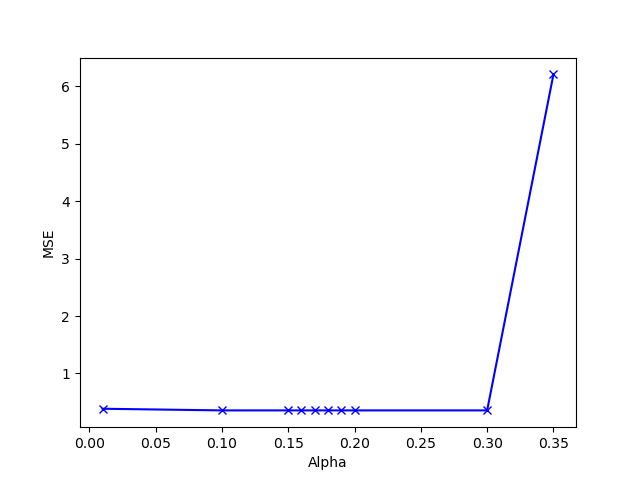

In [21]:
plt.figure()
plt.plot(alphas, mses_d_alpha, 'bx-')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

<IPython.core.display.Javascript object>


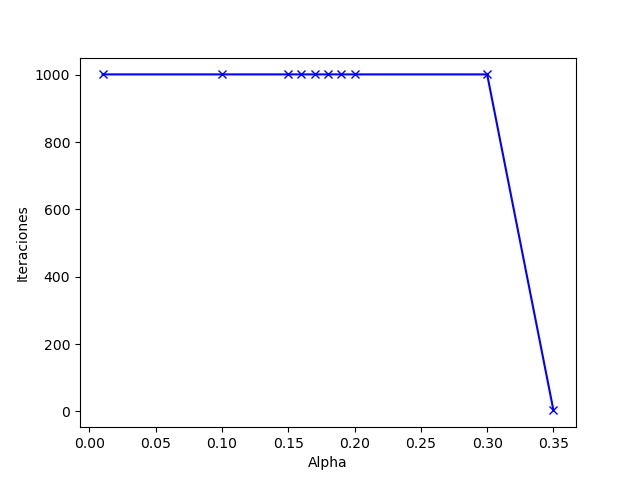

In [22]:
plt.figure()
plt.plot(alphas, pasos_d_alpha, 'bx-')
plt.xlabel('Alpha')
plt.ylabel('Iteraciones')
plt.show()

<IPython.core.display.Javascript object>


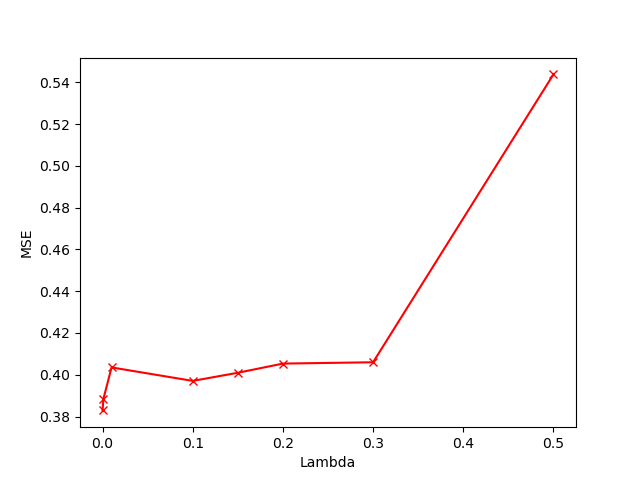

In [23]:
plt.figure()
plt.plot(lambdas, mses_d_lambda, 'rx-')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

<IPython.core.display.Javascript object>


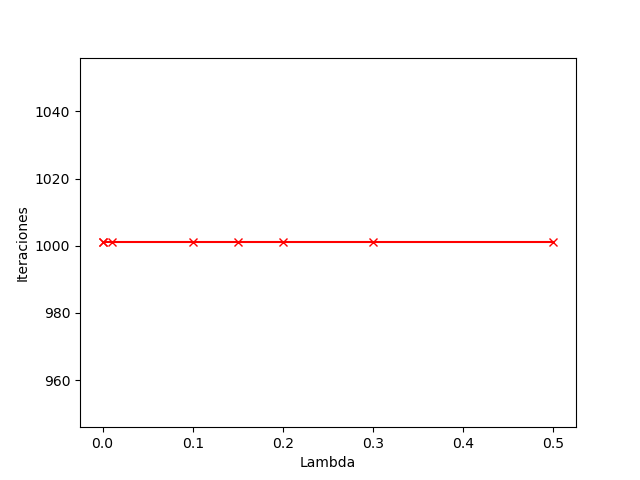

In [24]:
plt.figure()
plt.plot(lambdas, pasos_d_lambda, 'rx-')
plt.xlabel('Lambda')
plt.ylabel('Iteraciones')
plt.show()

Probamos el regresor con diferentes modelos:

In [25]:
x1 = x_norm.copy()
x2 = pd.DataFrame()
x2["LSTAT"] = x_norm["LSTAT"].copy()
x2["LSTAT2"] = x_norm["LSTAT"] ** 2
x2["LSTAT3"] = x_norm["LSTAT"] ** 3
x3 = x_norm[['RM', 'LSTAT']].copy()
x4 = pd.DataFrame()
x4["RM2"] = x_norm["RM"] ** 2
x4["RMLSTAT"] = x_norm["RM"] * x["LSTAT"]
x4["LSTAT2"] = x_norm["LSTAT"] ** 2

In [26]:
model1 = Regressor()
x_train, x_test, y_train, y_test = train_test_split(x1, y_norm,  random_state=23)
model1.train(x_train, y_train, 10000, 0.001, 0.1, 0.5)
hy = model1.predict(x_test)
print("Convergencia del modelo 1 en: ", len(model1.costs), " iteraciones")
print("MSE del modelo 1: ",mse(hy, y_test))

model2 = Regressor()
x_train, x_test, y_train, y_test = train_test_split(x2, y_norm,  random_state=23)
model2.train(x_train, y_train, 10000, 0.001, 0.1, 0.5)
hy = model2.predict(x_test)
print("Convergencia del modelo 2 en: ", len(model2.costs), " iteraciones")
print("MSE del modelo 2: ",mse(hy, y_test))

model3 = Regressor()
x_train, x_test, y_train, y_test = train_test_split(x3, y_norm,  random_state=23)
model3.train(x_train, y_train, 10000, 0.001, 0.1, 0.5)
hy = model3.predict(x_test)
print("Convergencia del modelo 3 en: ", len(model3.costs), " iteraciones")
print("MSE del modelo 3: ",mse(hy, y_test))

model4 = Regressor()
x_train, x_test, y_train, y_test = train_test_split(x4, y_norm,  random_state=23)
model4.train(x_train, y_train, 10000, 0.001, 0.1, 0.5)
hy = model4.predict(x_test)
print("Convergencia del modelo 4 en: ", len(model4.costs), " iteraciones")
print("MSE del modelo 4: ",mse(hy, y_test))

Convergencia del modelo 1 en:  1001  iteraciones
MSE del modelo 1:  0.35586321135801363
Convergencia del modelo 2 en:  24  iteraciones
MSE del modelo 2:  0.5072410310921626
Convergencia del modelo 3 en:  1001  iteraciones
MSE del modelo 3:  0.47155148748067305
Convergencia del modelo 4 en:  2  iteraciones
MSE del modelo 4:  22272.41879043048


Comparamos nuestro regresor con el de la librería

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm,  random_state=23)
regr = regression(x_train, y_train)
predictions = regr.predict(x_test)
print("Resultado con la librería: ", mse(predictions, y_test))

regr = Regressor()
regr.train(x_train, y_train, max_iter = 10000, epsilon = 0.001, alpha = 0.15, reg = 0.1)
predictions = regr.predict(x_test)
print("Resultado con nuestra función:", mse(predictions, y_test))

Resultado con la librería:  0.3573407107095565
Resultado con nuestra función: 0.3570514288166488


Generamos un gráfico 3D para responder a las últimas preguntas

<IPython.core.display.Javascript object>


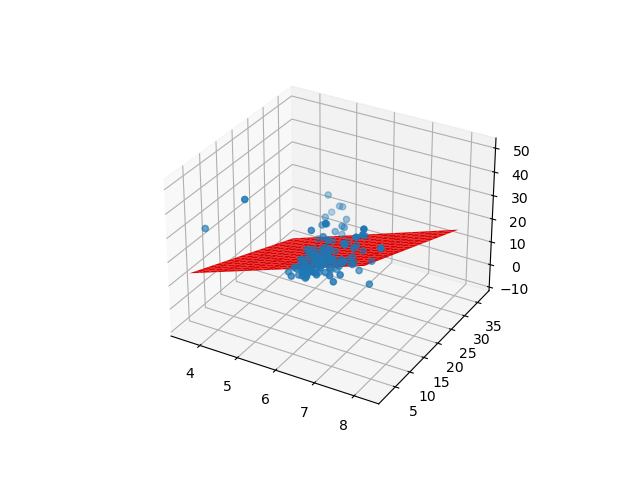

In [30]:

%matplotlib notebook

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=0, skiprows = 1, names=column_names, delimiter='\s+')

x = dataset[['RM','LSTAT']]
y = dataset['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=23)

from mpl_toolkits.mplot3d import axes3d, Axes3D

x_val = x_train[['RM','LSTAT']]
y_val = y_train
regr = regression(x_val, y_val)
predX3D = regr.predict(x_test[['RM','LSTAT']])

# Afegim els 1's
A = np.hstack((x_test,np.ones([x_test.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_test['RM']) - min(x_test['RM']))/2 + min(x_test['RM'])
malla_x2 =  malla * (max(x_test['LSTAT']) - min(x_test['LSTAT']))/2 + min(x_test['LSTAT'])

xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

zplot = w[0] * xplot + w[1] * yplot + w[2]

plt3d = plt.figure(dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_test['RM'],x_test['LSTAT'],y_test)